In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load old epic egg weights file
epic_egg = pd.read_csv("epic_egg_weights.csv")
epic_egg["p"] = epic_egg.loc[:,"Weight"]/epic_egg.loc[:,"Weight"].sum()

paradox = list(epic_egg[epic_egg["Label"] == "PARADOX"].iloc[:,0])
egg_only = list(epic_egg[epic_egg["Label"] == "EGGSCLUSIVE"].iloc[:,0])

all_egg_only = paradox+egg_only

In [3]:
#Load new epic egg weights file (thank you c4v)
epic_egg_new = pd.read_csv("epic_egg_weights_updated_fixed.csv")
epic_egg_new = epic_egg_new[:-1] #Drop the last row
epic_egg_new["p"] = epic_egg_new.loc[:,"Weight"]/epic_egg_new.loc[:,"Weight"].sum()

paradox_new = list(epic_egg_new[epic_egg_new["Label"] == "PARADOX"].iloc[:,0])
egg_only_new = list(epic_egg_new[epic_egg_new["Label"] == "EGGSCLUSIVE"].iloc[:,0])

all_egg_only_new = paradox_new + egg_only_new

In [4]:
#Read saved simulations
egg_realizations_df = pd.read_pickle("egg_simulation.pkl")
egg_realizations_update_df = pd.read_pickle("egg_simulation_updated_weights.pkl")

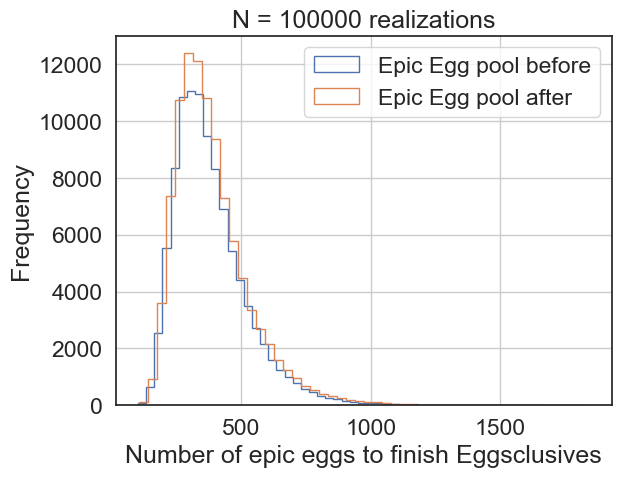

In [5]:
median = egg_realizations_df.counts.median()
tenth = egg_realizations_df.counts.quantile(0.1)
ninetieth = egg_realizations_df.counts.quantile(0.9)

sns.set(font_scale = 1.5, style = "white")
egg_realizations_df["counts"].hist(bins = 50, histtype = "step", label = "Epic Egg pool before")
egg_realizations_update_df["counts"].hist(bins = 50, histtype = "step", label = "Epic Egg pool after")
plt.xlabel("Number of epic eggs to finish Eggsclusives")
plt.ylabel("Frequency")
plt.title(f"N = {len(egg_realizations_df)} realizations")
# plt.axvline(tenth,color = 'g', ls = '--', label = f'10th percentile:{tenth}', alpha = 0.5)
# plt.axvline(ninetieth,color = 'r', ls = '--', label = f'90th percentile:{ninetieth}', alpha = 0.5)
plt.legend()


In [6]:
tenth = egg_realizations_df.counts.quantile(0.1)
median = egg_realizations_df.counts.quantile(0.5)
ninetieth = egg_realizations_df.counts.quantile(0.9)

tenth_new = egg_realizations_update_df.counts.quantile(0.1)
median_new = egg_realizations_update_df.counts.quantile(0.5)
ninetieth_new = egg_realizations_update_df.counts.quantile(0.9)

print(f"Median epic eggs to unlock epic eggsclusives before cost update: {median}")
print(f"Median epic eggs to unlock epic eggsclusives after cost update: {median_new}")

print(f"10th percentile (old): {tenth} epic eggs")
print(f"10th percentile (new): {tenth_new} epic eggs")

print(f"90th percentile (old): {ninetieth} epic eggs")
print(f"90th percentile (new): {ninetieth_new} epic eggs")

print(f"Average epic eggs to unlock epic eggsclusives before cost update: {egg_realizations_df.counts.mean()}")
print(f"Average epic eggs to unlock epic eggsclusives before cost update: {egg_realizations_update_df.counts.mean()}")

Median epic eggs to unlock epic eggsclusives before cost update: 355.0
Median epic eggs to unlock epic eggsclusives after cost update: 359.0
10th percentile (old): 235.0 epic eggs
10th percentile (new): 239.0 epic eggs
90th percentile (old): 565.0 epic eggs
90th percentile (new): 579.0 epic eggs
Average epic eggs to unlock epic eggsclusives before cost update: 382.91096
Average epic eggs to unlock epic eggsclusives before cost update: 389.47177


In [9]:
median * (256/7) #Approximate number of eggs to get median number of epic eggs

12982.857142857141